# E-tivity 1 - Exploratory Data Analysis (EDA) Bank data

Name: Soin Slavescu

Student ID: 21185131

In this notebook I'm trying to identify if there is any correlation between the time of the calls, the age and the result of the campaign. By time of calls I will consider a combination of day and month.

In [102]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('./bank.csv')

## B. Quick Data Exploration

In [104]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [105]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We can see that the dataset has 2000 data rows, and both numerical and categorical attributes.


#### B.1. Quick Examination of Numerical Attributes

In [106]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

In [107]:
#some info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


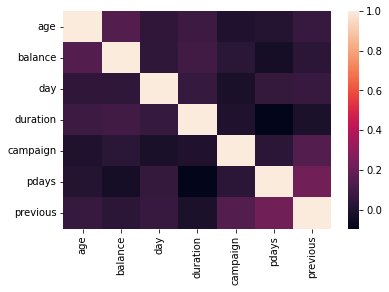

In [108]:
#correlation matrix
sns.heatmap(df.corr());

The heat map doesn't show any obvious correlations.

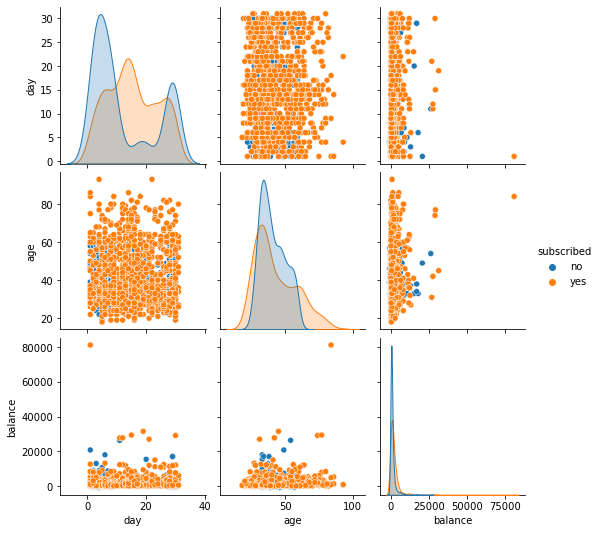

In [109]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['month','day','age','balance', 'subscribed']].dropna(), hue='subscribed')
plt.show()

Looks like the combinations of these chosen field do not show any particular trend. 

Let's look at a bar chart showing the outcome vs some of the numerical fields.

How does balance affect the outcome:

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

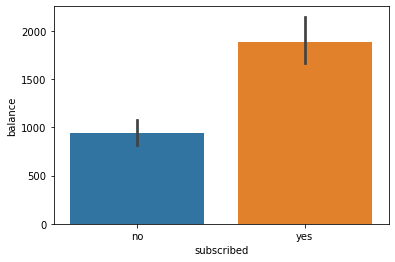

In [110]:
sns.barplot(x=df['subscribed'], y=df['balance'])

A conclusion might be that the longer the people are on the phone the more likely they are to subscribe

Let's look at age vs result:

<AxesSubplot:xlabel='subscribed', ylabel='age'>

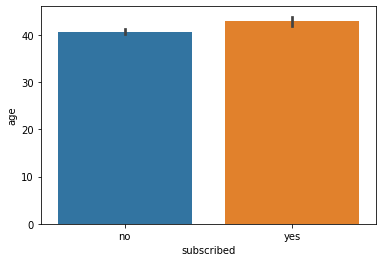

In [111]:
sns.barplot(y=df['age'], x=df['subscribed'])

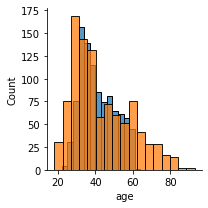

In [112]:
sns.FacetGrid(df, hue='subscribed').map(sns.histplot,'age')

#### B.2. Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. `month`, `housing`, `job`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

In [113]:
print(df['subscribed'].count())
df['subscribed'].value_counts()

2000


no     1000
yes    1000
Name: subscribed, dtype: int64

In [114]:
df['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

## C. Distribution Analysis for Numerical Atributes

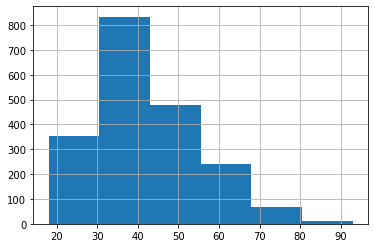

In [115]:
# Let's start by plotting a histogram of age using the command:

df['age'].hist(bins=6)

plt.show()

Majority of people have an age between 30-50

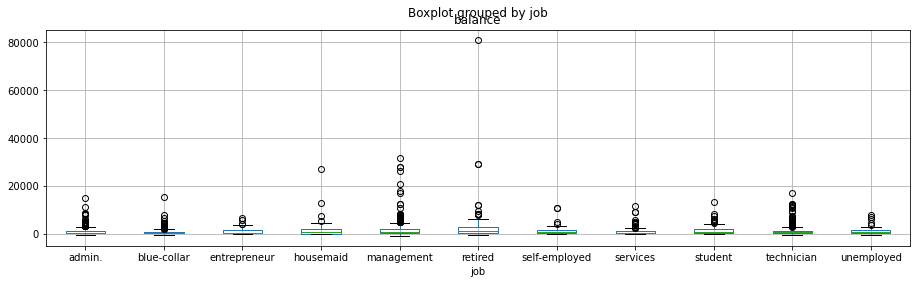

In [116]:
# Boxp lots of balance, grouped by the categorical attribute job
df.boxplot(column=['balance'], by='job', figsize=(15,4))
plt.show()

In conclusion I don't see a way of learning the possible outcome from the date and time of calls and the age of the person to call. As age is a PII customers may not be willing to share it so might be useful to look at differente combinations not including PII like balance.